# Model regresja

In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/ekstraklasa_clean.csv")
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,...,Gls_std,Ast_std,G+A_std,Gls_shoot,Sh,SoT,Sh/90,SoT/90,G/Sh,G/SoT
0,1,Lech Poznań,34,22,4,8,68,31,37,70,...,67,49,116,67,531,183,15.62,5.38,0.12,0.34
1,2,Raków,34,20,9,5,51,23,28,69,...,50,37,87,50,469,164,13.79,4.82,0.10,0.28
2,3,Jagiellonia,34,17,10,7,56,42,14,61,...,55,40,95,55,480,152,14.12,4.47,0.10,0.33
3,4,Pogoń Szczecin,34,17,7,10,59,40,19,58,...,56,38,94,56,513,180,15.09,5.29,0.10,0.28
4,5,Legia Warsaw,34,15,9,10,60,45,15,54,...,59,39,98,59,520,172,15.29,5.06,0.10,0.30


In [2]:
# Wybór zmiennych do modelu
features = [
    'GF',      # gole strzelone
    'GA',      # gole stracone
    'Poss',    # posiadanie piłki
    'Sh/90',   # strzały na 90
    'SoT/90',  # strzały celne na 90
    'G/Sh',    # skuteczność strzałów
    'G/SoT'    # skuteczność celnych
]

In [3]:
X = df[features]
y = df['Pts']

In [4]:
# Standaryzacja
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# model regresji liniowej
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled, y)

model.coef_, model.intercept_

(array([-0.86930394, -7.63277263, -1.31613059, -0.66830161,  3.43953687,
         1.57335207,  5.56108167]),
 np.float64(46.72222222222222))

In [6]:
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)

importance


,Feature,Coefficient
6,G/SoT,5.561082
4,SoT/90,3.439537
5,G/Sh,1.573352
3,Sh/90,-0.668302
0,GF,-0.869304
2,Poss,-1.316131
1,GA,-7.632773


In [7]:
#R²
from sklearn.metrics import r2_score

y_pred = model.predict(X_scaled)
r2_score(y, y_pred)

0.9451880698542499

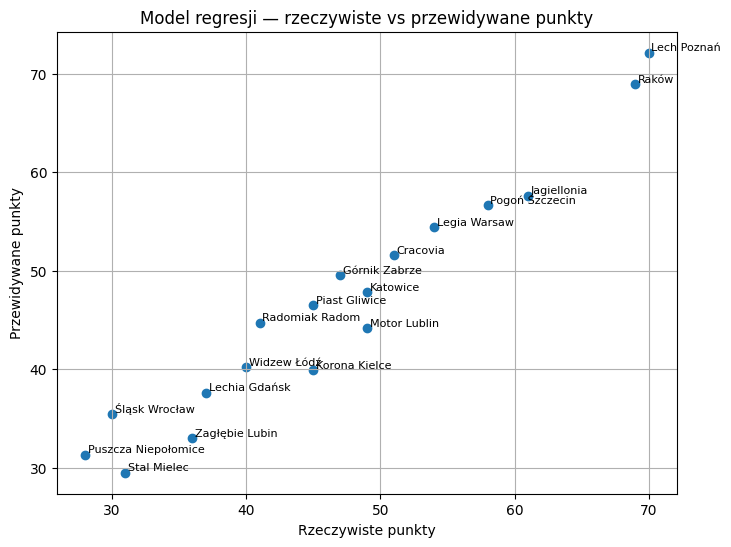

In [8]:
# Wykres: przewidywane punkty vs rzeczywiste
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred)

for i, row in df.iterrows():
    plt.text(row['Pts'] + 0.2, y_pred[i] + 0.2, row['Squad'], fontsize=8)

plt.xlabel("Rzeczywiste punkty")
plt.ylabel("Przewidywane punkty")
plt.title("Model regresji — rzeczywiste vs przewidywane punkty")
plt.grid(True)
plt.show()

In [9]:
# Expected points dla każdej drużyny
df['Predicted_Pts'] = y_pred
df[['Squad', 'Pts', 'Predicted_Pts']].sort_values('Predicted_Pts', ascending=False)

,Squad,Pts,Predicted_Pts
0,Lech Poznań,70,72.123751
1,Raków,69,68.905237
2,Jagiellonia,61,57.608251
3,Pogoń Szczecin,58,56.677336
4,Legia Warsaw,54,54.386850
5,Cracovia,51,51.606787
8,Górnik Zabrze,47,49.530769
7,Katowice,49,47.797315
9,Piast Gliwice,45,46.479511
11,Radomiak Radom,41,44.710584


In [10]:
# Różnica punkty – expected
df['Diff'] = df['Pts'] - df['Predicted_Pts']

df[['Squad', 'Pts', 'Predicted_Pts', 'Diff']].sort_values('Diff', ascending=False)

,Squad,Pts,Predicted_Pts,Diff
10,Korona Kielce,45,39.920302,5.079698
6,Motor Lublin,49,44.165639,4.834361
2,Jagiellonia,61,57.608251,3.391749
14,Zagłębie Lubin,36,32.998360,3.001640
15,Stal Mielec,31,29.496075,1.503925
3,Pogoń Szczecin,58,56.677336,1.322664
7,Katowice,49,47.797315,1.202685
1,Raków,69,68.905237,0.094763
12,Widzew Łódź,40,40.189111,-0.189111
4,Legia Warsaw,54,54.386850,-0.386850


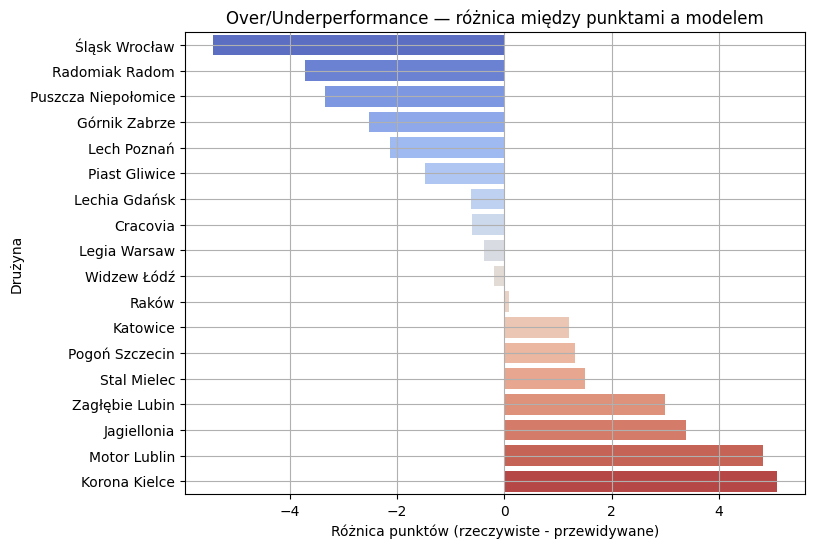

In [11]:
# Barplot over/underperformance
import seaborn as sns
df_over = df[['Squad','Diff']].sort_values('Diff')

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_over,
    x='Diff',
    y='Squad',
    hue='Squad',
    palette='coolwarm',
    legend=False
)

plt.title("Over/Underperformance — różnica między punktami a modelem")
plt.xlabel("Różnica punktów (rzeczywiste - przewidywane)")
plt.ylabel("Drużyna")
plt.grid(True)
plt.show()